In [1]:
import os
import pandas as pd
HOUSING_PATH = "datasets/housing"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
housing=load_housing_data()

In [3]:
for set in (strat_train_set, strat_test_set):
set.drop(["income_cat"], axis=1, inplace=True)

IndentationError: expected an indented block (<ipython-input-3-3f591bd89f3e>, line 2)

In [4]:
housing2 = strat_train_set.copy()

NameError: name 'strat_train_set' is not defined

In [5]:
housing.plot(kind="scatter", x="longitude", y="latitude")

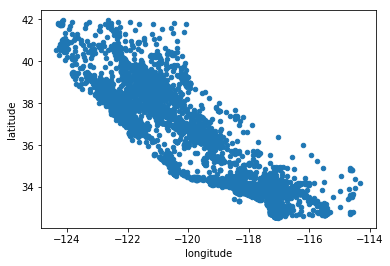

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude")

In [7]:
plt.savefig("p57_1.png") 

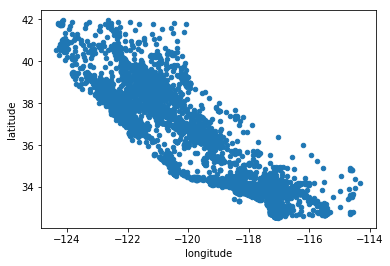

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude")
plt.savefig("p57_1.png") 

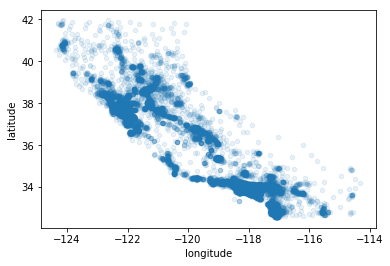

In [10]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

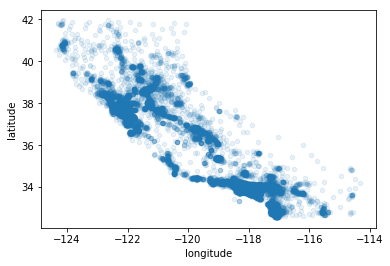

In [11]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
plt.savefig("p57_2.png") 

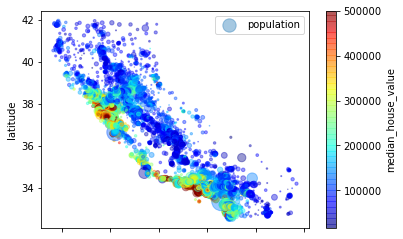

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()


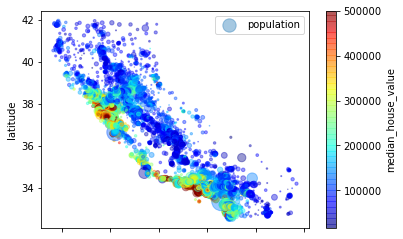

In [13]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population",
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
plt.savefig("p57_3.png")

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [16]:
corr_matrix.plot_corr

AttributeError: 'DataFrame' object has no attribute 'plot_corr'

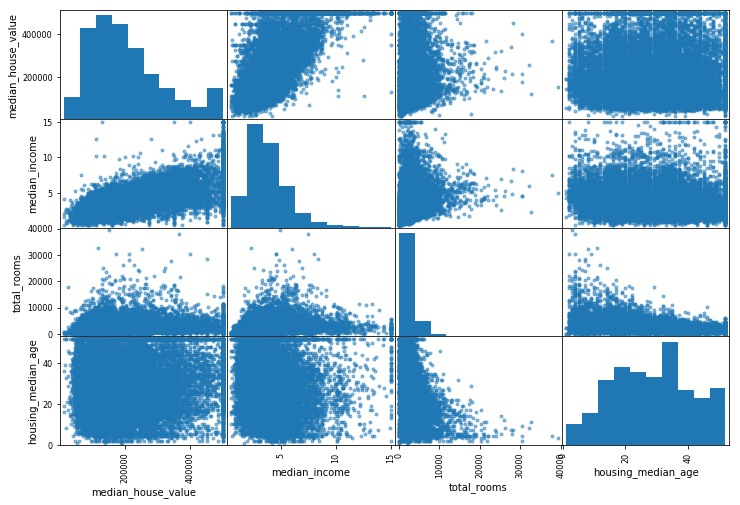

In [18]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.savefig("p57_4.png")

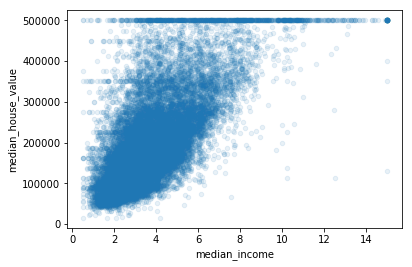

In [19]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.savefig("p57_5.png")

In [20]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["population"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]


In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.209482
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [23]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


NameError: name 'strat_train_set' is not defined

In [24]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median) # option 3


0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
5         213.0
6         489.0
7         687.0
8         665.0
9         707.0
10        434.0
11        752.0
12        474.0
13        191.0
14        626.0
15        283.0
16        347.0
17        293.0
18        455.0
19        298.0
20        184.0
21        367.0
22        541.0
23        337.0
24        437.0
25        123.0
26        244.0
27        421.0
28        492.0
29        160.0
          ...  
20610     484.0
20611     441.0
20612     289.0
20613     365.0
20614     460.0
20615     216.0
20616     441.0
20617     109.0
20618     247.0
20619     340.0
20620      41.0
20621     247.0
20622     147.0
20623     244.0
20624     300.0
20625      17.0
20626     184.0
20627      65.0
20628     421.0
20629    1856.0
20630     505.0
20631     493.0
20632     416.0
20633     412.0
20634     395.0
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, dt

In [25]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")


In [26]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [27]:
imputer.fit(housing_num)


Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [28]:
imputer.statistics_

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05,
         1.93793590e+00,   2.03162434e-01,   2.81811565e+00])

In [29]:
housing_num.median().values

array([ -1.18490000e+02,   3.42600000e+01,   2.90000000e+01,
         2.12700000e+03,   4.35000000e+02,   1.16600000e+03,
         4.09000000e+02,   3.53480000e+00,   1.79700000e+05,
         1.93793590e+00,   2.03162434e-01,   2.81811565e+00])

In [30]:
X = imputer.transform(housing_num)

In [31]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)